Student Performance Indicator
Life Cycle of Machine Learning Project
. Understanding the Problem Statement
. Data Collection
. Exploratory Data Analysis
. Data Pre-Processing
. Model Training
. Choose best model

1) Problem Statement

This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

2) Data Collection

Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetid=74977

The dataset consists of 8 columns and 1000 rows.

2.1 Import data and required packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import csv file

In [3]:
df = pd.read_csv('stud.csv')

Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Dataset

In [5]:
df.shape

(1000, 8)

2.2 Dataset Information
. gender:sex of students--> (Male/Female)
. race/ethnicity: ethnicity of students--> (Group A,B,C,D,E)
. lunch: having lunch before test(standard or free/reduced)
. test preparation course: complete or not complete before test
. math score
. reading score
. writing score

3. Data checks to perform

. Checking missing values
. Checking duplicates
. Check data type
. Check the number of unique values of each column
. Check statistics of data set
. Check various categories present in the different categorical column

3.1 Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

3.2 Checking for duplicates values

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in dataset

3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check for the number of unique values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above info we could see that:
1) All means are very close to each other ranging between 66 and 68.05.
2) All standard deviation are also close ranging between 14 and 15.19.
3) Minimum score for math is 0 whereas for writing is 10 and reading is 17.

3.7 Exploring data

In [12]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [14]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 Adding columns for "Total Score" and "Average Score"

In [15]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [22]:
reading_less_20 = df[df['reading score'] < 20]['average_score'].count()
writing_less_20 = df[df['writing score'] < 20]['average_score'].count()
maths_less_20 = df[df['math score'] < 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {maths_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


Insights:
1) Students have performed worst performance in maths.
2) Best performance in reading.

4. Exploring data(Visualization)
 4.1 Visualize average score distribution to make some conclusion.
    . Histogram
    . Kernel distribution function (KDE)

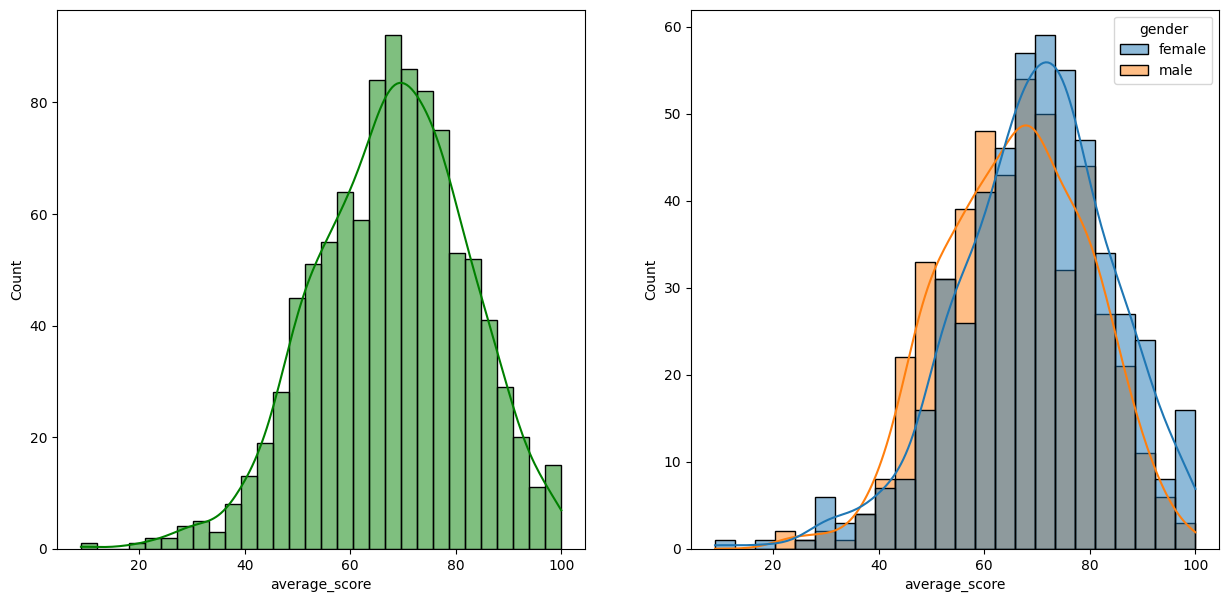

In [23]:
#Histogram & KDE
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score',bins = 30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True,hue='gender')
plt.show()

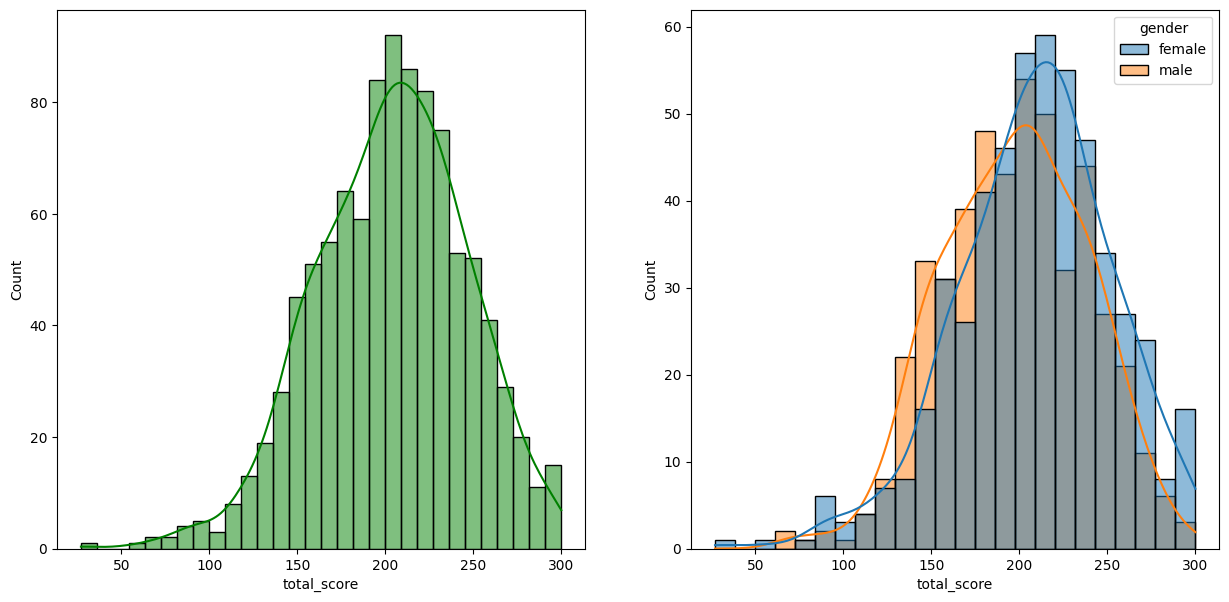

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins = 30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True,hue='gender')
plt.show()

Insights:
Female students tends to perform well compared to Male.

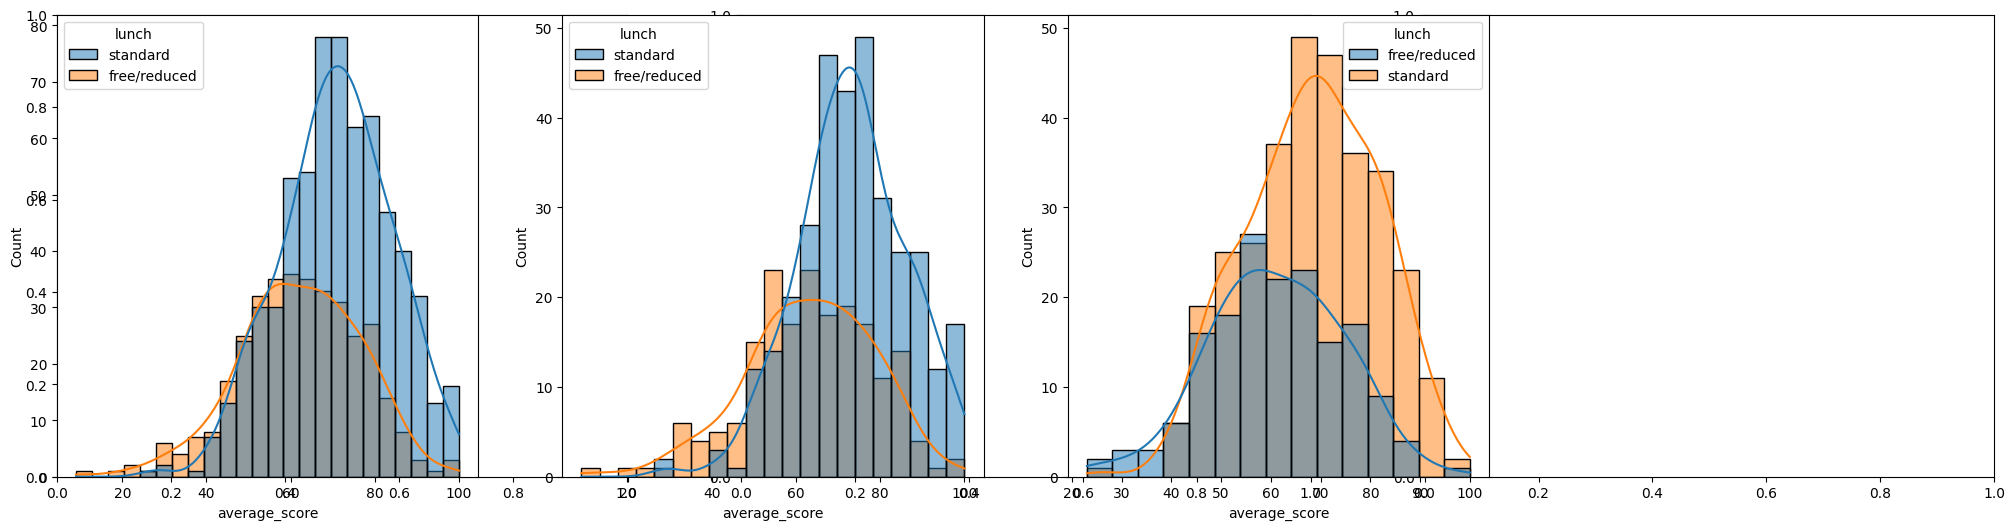

In [25]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True,hue='lunch')
plt.show()

Insights:
Standard lunch helps to perform well be it male or female students.

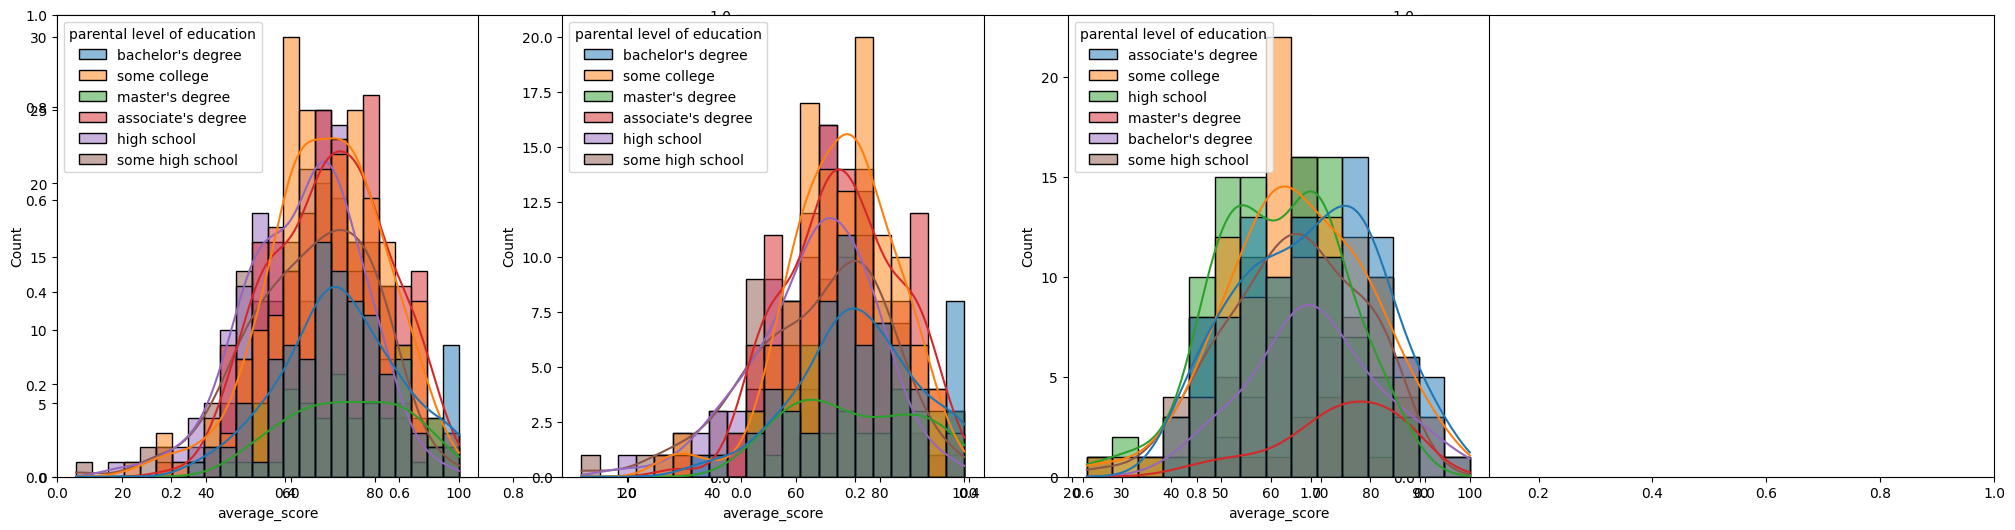

In [26]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True,hue='parental level of education')
plt.show()